### Sharan S
### Assignment - 5 Multilinear regression

####  Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a               table containing R^2 value for each prepared model.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np
import statsmodels.formula.api as smf
data=pd.read_csv("C:\\Users\\SHARAN\\Desktop\\ExcelR\\Assignment\\Assignment-5 Multi linear regression\\50_Startups.csv")
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [49]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [50]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [87]:
data.rename(columns={'R&D Spend':'rds','Marketing Spend':'mks'},inplace=True)

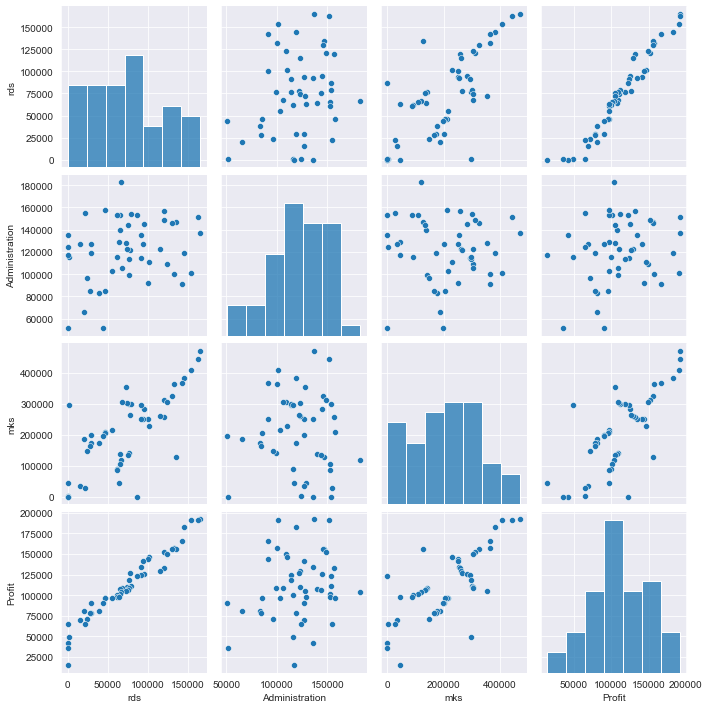

In [52]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [70]:
model=smf.ols('Profit~rds+Administration+mks',data=data).fit()

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        11:50:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rds                0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
mks                0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
rsq_rds=smf.ols('rds~Administration+mks',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_mks=smf.ols('mks~Administration+rds',data=data).fit().rsquared
vif_mks=1/(1-rsq_mks)

rsq_Administration=smf.ols('Administration~rds+mks',data=data).fit().rsquared
vif_Administration=1/(1-rsq_Administration)

In [55]:
d1={'Variables':['rds','Administration','mks'],'VIF':[vif_rds,vif_Administration,vif_mks]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,rds,2.468903
1,Administration,1.175091
2,mks,2.326773


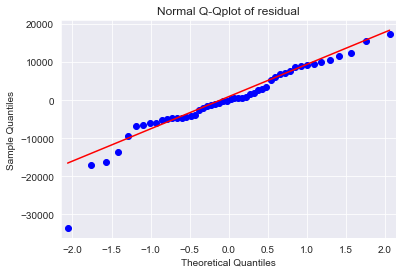

In [57]:
# checking for normality of residuals
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Qplot of residual')
plt.show()

In [73]:
data['Predicted']=model.fittedvalues
data['Errors']=model.resid
data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit,Predicted,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [74]:
# checking for outliers
list(np.where(model.resid<-22000))

[array([49], dtype=int64)]

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Errors'>

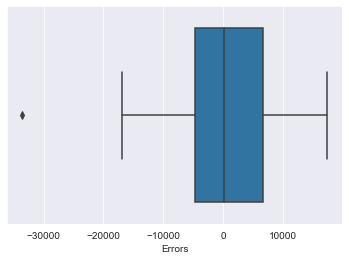

In [64]:
%matplotlib inline
sns.boxplot(data['Errors'])

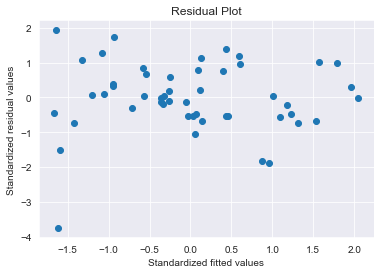

In [78]:
def get_standardized_value(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_value(model.fittedvalues),get_standardized_value(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [83]:
d2={'Fitted':get_standardized_value(model.fittedvalues),'resid':get_standardized_value(model.resid)}
Frame=pd.DataFrame(d2)
Frame.head(5)

,Fitted,resid
0,2.048512,-0.029001
1,1.962904,0.294602
2,1.784550,0.995289
3,1.569528,1.029070
4,1.529906,-0.665334


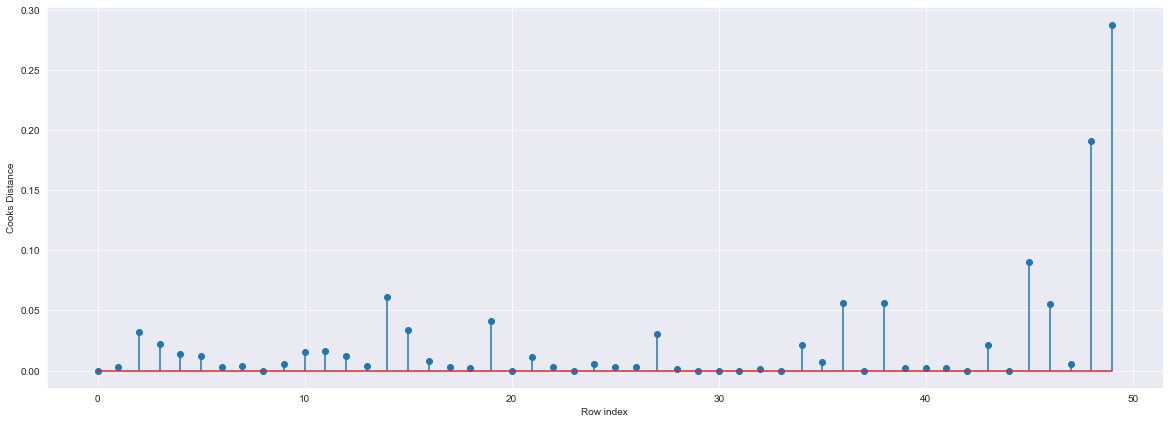

In [85]:
# to vizualize distance between regression line and points
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

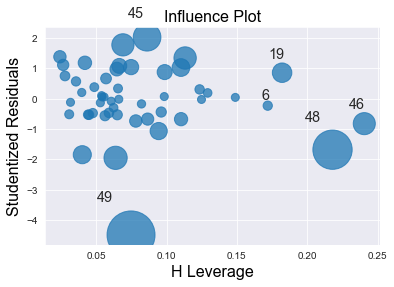

In [86]:
influence_plot(model)
plt.show()